In [234]:
import random as rd
import numpy as np
import seaborn as sn
import pandas as pd

In [235]:
mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 100

In [236]:
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3

In [237]:
c = np.vstack((-np.ones((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

In [238]:
X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
#Visualize first your dataset and then write the Kmeans algorithm
data = pd.DataFrame(data=X, columns=['x','y','c'])

In [239]:
data

,x,y,c
0,-0.334207,2.058738,-1.0
1,3.264395,5.636814,1.0
2,-0.669884,1.856185,-1.0
3,1.995284,4.484924,1.0
4,3.588041,4.739172,1.0
5,-1.988864,1.713443,-1.0
6,2.835925,6.653662,1.0
7,-1.250864,1.971740,-1.0
8,2.152984,6.004102,1.0
9,2.962082,5.537159,1.0


In [240]:
class Perceptron(object):

    def __init__(self, threshold=1000, learning_rate=0.001):
        self.threshold = threshold
        self.learning_rate = learning_rate
        
    def predict(self, inputs):          
        return (np.dot(inputs, self.weights) >= 0 ) * 1

    def train(self, training_inputs, labels):
        self.weights = np.zeros(training_inputs.shape[1])
        for _ in range(self.threshold):
            pred = self.predict(training_inputs)
            self.weights += self.learning_rate * np.dot((labels - pred), training_inputs)

In [265]:
data1 = np.concatenate((np.ones(len(data)).reshape(-1,1),data.drop(columns=['c'])), axis= 1)
x = data1[:,:-1]
y = data['c'].apply(lambda e: 0 if e < 0 else 1).values

In [266]:
p = Perceptron(100)

In [267]:
p.train(x, y)

In [268]:
p.weights

array([-0.175     ,  0.48402602,  0.0250917 ])

In [269]:
prediction = p.predict(x)

In [270]:
data['pre'] = prediction

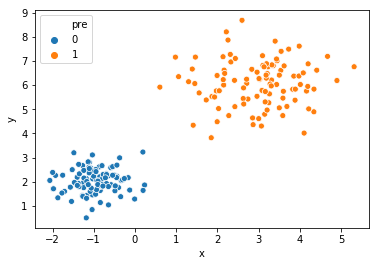

In [271]:
sn.scatterplot(x='x', y='y', hue='pre', data=data)